In [1]:
import numpy as np
from qiskit import*

In [21]:
Pauli_x = np.matrix([[0,1],
                     [1,0]])
Pauli_y = np.matrix([[0,-1j],
                     [1j,0]])
Pauli_z = np.matrix([[1,0],
                     [0,-1]])
S_gate  = np.matrix([[1,0],
                     [0,1j]])
H_gate  = (1/np.sqrt(2))*np.matrix([[1,1],
                                    [1,-1]])

# Hamiltonian

$$ H = -J\sum^{L-1}_{j=1}(X_{j}X_{j+1}+Y_{j}Y_{j+1}+Z_{j}Z_{j+1})  = -J\sum_{\rm odd} H -J \sum_{\rm even} H $$
Time evolution
$$ U = e^{-iH\delta} \approx e^{-iH_{\rm odd}\delta} e^{-iH_{\rm even}\delta} = (e^{-iH_{12}\delta} e^{-iH_{34}\delta}\cdots)(e^{-iH_{23}\delta} e^{-iH_{45}\delta}\cdots)$$


# Implementing the gate: $\exp(-iJ(Z_{1} \otimes Z_{2}) \delta)$
This can be done using the followng circuit (Source: https://arxiv.org/abs/1001.3855)

In [65]:
# Number of qubits in the system.
L = 4

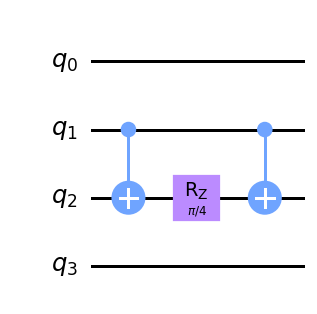

In [76]:
def zz_circuit(qubit_0,qubit_1,delta):
    qc_zz = QuantumCircuit(L)
    qc_zz.cx(qubit_0,qubit_1)
    qc_zz.rz(2*delta,qubit_1)
    qc_zz.cx(qubit_0,qubit_1)
    return qc_zz.draw("mpl",scale=1.5)
zz_circuit(1,2,np.pi/8)

# Implementing the gate: $\exp(-iJ(X_{1} \otimes X_{2}) \delta)$
The following identity is used (Source: https://learn.microsoft.com/en-us/azure/quantum/user-guide/libraries/chemistry/concepts/algorithms)
$$\exp(-iJ(X_{1} \otimes X_{2}) \delta) = (H \otimes H) \exp(-i(Z \otimes Z)\delta) (H \otimes H)$$

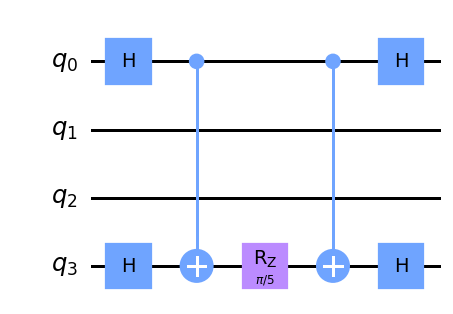

In [77]:
def xx_circuit(qubit_0,qubit_1,delta):
    qc_xx = QuantumCircuit(L)
    qc_xx.h(qubit_0)
    qc_xx.h(qubit_1)
    qc_xx.cx(qubit_0,qubit_1)
    qc_xx.rz(2*delta,qubit_1)
    qc_xx.cx(qubit_0,qubit_1)
    qc_xx.h(qubit_0)
    qc_xx.h(qubit_1)
    return qc_xx.draw("mpl",scale=1.5)
xx_circuit(0,3,np.pi/10)

# Implementing the gate: $\exp(-iJ(Y_{1} \otimes Y_{2}) \delta)$

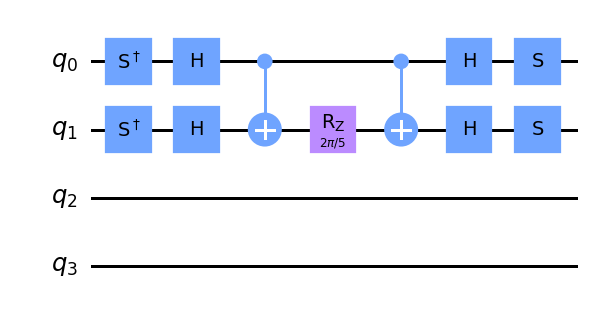

In [78]:
def yy_circuit(qubit_0,qubit_1,delta):
    qc_yy = QuantumCircuit(L)
    qc_yy.sdg(qubit_0)
    qc_yy.sdg(qubit_1)
    qc_yy.h(qubit_0)
    qc_yy.h(qubit_1)
    qc_yy.cx(qubit_0,qubit_1)
    qc_yy.rz(2*delta,qubit_1)
    qc_yy.cx(qubit_0,qubit_1)
    qc_yy.h(qubit_0)
    qc_yy.h(qubit_1)
    qc_yy.s(qubit_0)
    qc_yy.s(qubit_1)
    return qc_yy.draw("mpl",scale=1.5)
yy_circuit(0,1,np.pi/5)